In [38]:
# BEN MATHEW ASSESSMENT 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
dataset = pd.read_csv('Downloads/titanic.csv')
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


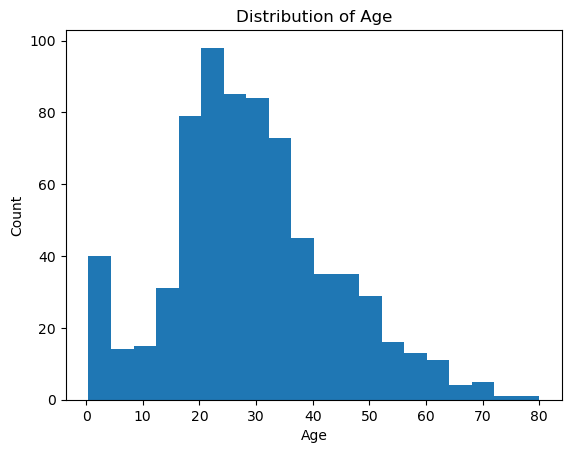

In [40]:
plt.hist(dataset['age'].dropna(), bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

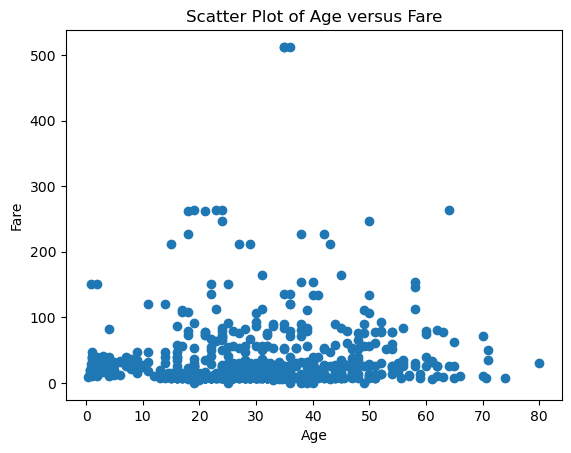

In [41]:
plt.scatter(dataset['age'], dataset['fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot of Age versus Fare')
plt.show()

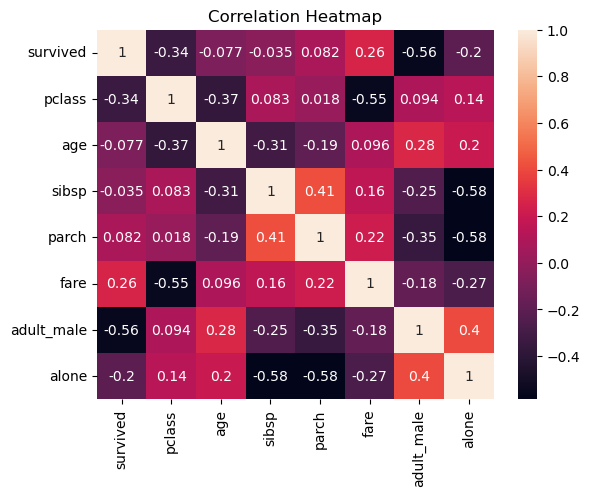

In [42]:
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [43]:
descriptive_stats = dataset.describe()
print(descriptive_stats)

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [44]:
dataset.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [45]:
# Dropping rows with missing values
dataset.dropna(inplace=True)

# Removing the 'deck' column because of large number of nulls
dataset.drop('deck', axis=1, inplace=True)

# Imputing missing values using mean
dataset['age'].fillna(dataset['age'].mean(), inplace=True)

In [46]:
dataset.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

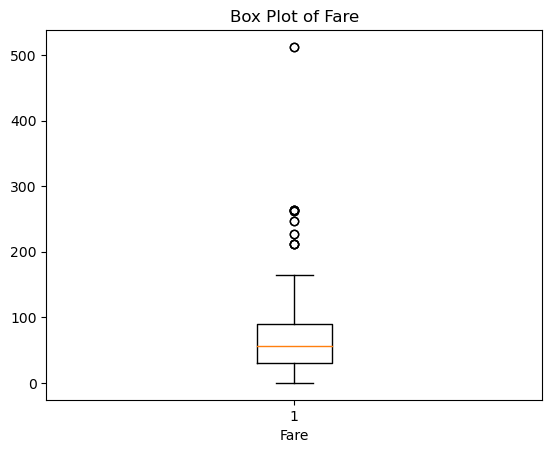

In [47]:
# Example: Box plot of 'fare' column
plt.boxplot(dataset['fare'])
plt.xlabel('Fare')
plt.title('Box Plot of Fare')
plt.show()


# Replacing outliers with median
fare_median = dataset['fare'].median()

# Identify the outliers based on the threshold
outliers = dataset['fare'][np.abs(dataset['fare'] - fare_median) > 3 * dataset['fare'].std()]

# Replace the outliers with the median value
dataset.loc[outliers.index, 'fare'] = fare_median

In [50]:
from sklearn.preprocessing import OneHotEncoder

# Select the categorical variables for one-hot encoding
categorical_vars = ['sex', 'embarked', 'class', 'who', 'embark_town', 'alive', 'alone']

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform the categorical variables
X_categorical_encoded = encoder.fit_transform(dataset[categorical_vars])

# Create a DataFrame with the encoded variables
X_categorical_encoded = pd.DataFrame(X_categorical_encoded, columns=encoder.get_feature_names_out(categorical_vars))

# Concatenate the encoded categorical variables with the numerical variables
X_encoded = pd.concat([X_categorical_encoded, X_numerical], axis=1)


In [51]:
X = dataset.drop('survived', axis=1)  # Independent variables
y = dataset['survived']  # Dependent variable

In [52]:
X

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
3,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
6,1,male,54.0,0,0,51.8625,S,First,man,True,Southampton,no,True
10,3,female,4.0,1,1,16.7000,S,Third,child,False,Southampton,yes,False
11,1,female,58.0,0,0,26.5500,S,First,woman,False,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,female,47.0,1,1,52.5542,S,First,woman,False,Southampton,yes,False
872,1,male,33.0,0,0,5.0000,S,First,man,True,Southampton,no,True
879,1,female,56.0,0,1,83.1583,C,First,woman,False,Cherbourg,yes,False
887,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True


In [24]:
y

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: survived, Length: 182, dtype: int64

In [27]:
# Filter numerical columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

# Create a new DataFrame with only the independent numerical variables
X_numerical = X[numerical_columns]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical)
X_scaled

array([[-3.73419645e-01,  1.52081957e-01,  8.28575742e-01,
        -6.34158628e-01, -1.00110129e-01],
       [-3.73419645e-01, -3.98750185e-02,  8.28575742e-01,
        -6.34158628e-01, -3.38484771e-01],
       [-3.73419645e-01,  1.17585249e+00, -7.26071526e-01,
        -6.34158628e-01, -3.54707823e-01],
       [ 3.51014466e+00, -2.02343043e+00,  8.28575742e-01,
         6.92472065e-01, -8.15671915e-01],
       [-3.73419645e-01,  1.43179512e+00, -7.26071526e-01,
        -6.34158628e-01, -6.86542977e-01],
       [ 1.56836251e+00, -1.03860677e-01, -7.26071526e-01,
        -6.34158628e-01, -8.64177202e-01],
       [-3.73419645e-01, -4.87774627e-01, -7.26071526e-01,
        -6.34158628e-01, -5.69212621e-01],
       [-3.73419645e-01, -1.06364555e+00,  3.93787028e+00,
         2.01910276e+00,  2.41320703e+00],
       [-3.73419645e-01,  8.55924198e-01,  8.28575742e-01,
        -6.34158628e-01, -2.87169016e-02],
       [-3.73419645e-01,  1.87969473e+00, -7.26071526e-01,
         6.92472065e-01

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)